In [1]:
import pandas as pd
import numpy as np

import numerapi

import plotly.express as px

In [2]:
# some API calls do not require logging in
#public_id = "AVLW3M6UOZG3EIYLNN3JGUYHHC5MHV43"
#secret_key = "RSZTLYGVX4EICEDQFCMBKVS3MPPCZ6UT56ZMGAVD64DQEZRMAXNZIDBA6EW3XJTQ"
#napi = numerapi.NumerAPI(public_id, secret_key)
napi = numerapi.NumerAPI()

In [3]:
#napi.get_models()

In [4]:
pd.DataFrame(napi.daily_model_performances("xdf8_1"))

,corrRank,corrRep,date,fncRank,fncRep,mmcRank,mmcRep
0,6918,-0.077451,2021-11-02 00:00:00+00:00,6751,-0.076056,6781,-0.077786
1,6843,-0.076032,2021-10-30 00:00:00+00:00,6694,-0.074697,6697,-0.076540
2,6787,-0.074613,2021-10-29 00:00:00+00:00,6653,-0.073339,6653,-0.075294
3,6711,-0.073194,2021-10-28 00:00:00+00:00,6543,-0.071980,6557,-0.074048
4,6501,-0.071775,2021-10-27 00:00:00+00:00,6373,-0.070622,6402,-0.072802
...,...,...,...,...,...,...,...
129,6139,-0.099319,2021-05-05 00:00:00+00:00,6006,-0.098256,6112,-0.098636
130,6129,-0.099045,2021-05-04 00:00:00+00:00,6058,-0.098298,6115,-0.098603
131,6119,-0.098588,2021-05-01 00:00:00+00:00,6083,-0.098322,6101,-0.098534
132,6131,-0.098313,2021-04-30 00:00:00+00:00,6157,-0.098346,6120,-0.098532


In [43]:
df_daily_performance = pd.DataFrame(napi.daily_submissions_performances('xdf8_2'))
df_daily_performance

,corrPercentile,correlation,correlationWithMetamodel,date,fnc,fncPercentile,mmc,mmcPercentile,roundNumber
0,0.667689,0.008174,0.413073,2021-09-30 00:00:00+00:00,0.005067,0.473855,0.003991,0.719469,283
1,0.929250,0.012561,0.413059,2021-10-01 00:00:00+00:00,0.009897,0.717849,0.014764,0.920597,283
2,0.881539,0.021839,0.413059,2021-10-02 00:00:00+00:00,0.018439,0.636180,0.013842,0.902970,283
3,0.749578,0.023209,0.413059,2021-10-05 00:00:00+00:00,0.020542,0.491731,0.010719,0.851671,283
4,0.785859,0.005594,0.413059,2021-10-06 00:00:00+00:00,0.002764,0.285184,0.007357,0.756666,283
...,...,...,...,...,...,...,...,...,...
265,0.930892,0.013722,0.420893,2021-07-22 00:00:00+00:00,0.010028,0.583199,0.015295,0.916353,270
266,0.889068,0.009143,0.420893,2021-07-23 00:00:00+00:00,0.006644,0.501705,0.010922,0.855502,270
267,0.867528,0.004820,0.420893,2021-07-24 00:00:00+00:00,0.001700,0.464908,0.009658,0.821756,270
268,0.945073,0.017822,0.420893,2021-07-27 00:00:00+00:00,0.013159,0.742955,0.017213,0.938252,270


In [6]:
df_daily_performance['roundNumber'].unique()

array([283, 269, 263, 285, 287, 286, 266, 265, 267, 271, 284, 272, 280,
       268, 270])

In [7]:
lst = list(df_daily_performance['roundNumber'].unique())
lst

[283, 269, 263, 285, 287, 286, 266, 265, 267, 271, 284, 272, 280, 268, 270]

In [8]:
lst.sort()
lst

[263, 265, 266, 267, 268, 269, 270, 271, 272, 280, 283, 284, 285, 286, 287]

In [28]:
rounds = df_daily_performance['roundNumber'].unique()
rounds.sort()
list(rounds[-4:])

[284, 285, 286, 287]

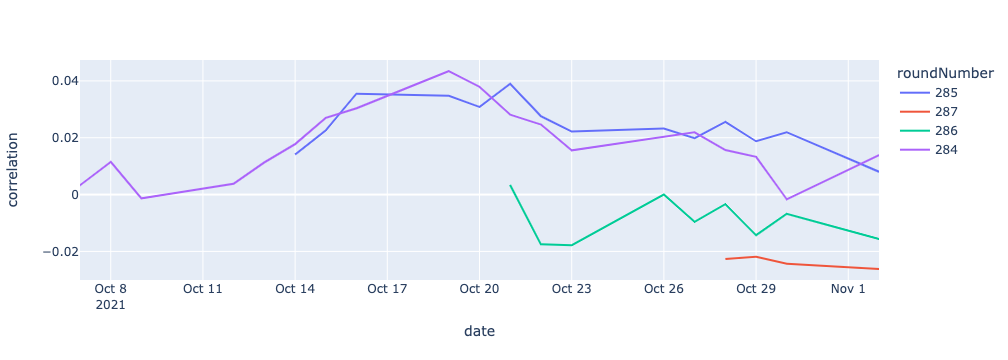

In [42]:
rounds = df_daily_performance['roundNumber'].unique()
rounds.sort()
list(rounds[-4:])

plot_df = df_daily_performance[df_daily_performance['roundNumber'].isin(list(rounds[-4:]))]#, ascending = False)
p = px.line(data_frame = plot_df, x = 'date', y = 'correlation', color = 'roundNumber')
p.update_layout(hovermode = 'x')
p.show()